### Figure 3

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap

In [7]:
npix={}
d=u'\N{DEGREE SIGN}'
npix['1'+d]=22648
npix['2'+d]=5666
npix['4'+d+'x5'+d]=1764
npix['sg']=400
def sims(ny,npix):
    if ny=='SASU':
        ny=140
    sg=400
    pecost=5
    s=t/((ny+10)*npix/sg*pecost)
    if s<10:
        s=np.round(s,1)
    else:
        s=int(np.round(s))
    return s

In [21]:
t=1e6
pecost=5
nys=[*4*[1500],*4*['SASU']]
r=['1'+d,'2'+d,'4'+d+'x5'+d,'sg']
gs =[*r,*r]
svals={}
for ny,g in zip(nys,gs):
    x = "yrs" if ny==1500 else ""
    k=str(ny)+x+'-'+g
    svals[k]=sims(ny,npix[g])

In [9]:
ds=xr.open_dataset('clusters.clm51_PPEn02ctsm51d021_2deg_GSWP3V1_leafbiomassesai_PPE3_hist.annual+sd.400.nc')
lons=xr.DataArray([c[0] for c in ds.rcent_coords.values],dims='lon')
lats=xr.DataArray([c[1] for c in ds.rcent_coords.values],coords=[lons])

In [10]:
import warnings
warnings.filterwarnings("ignore")

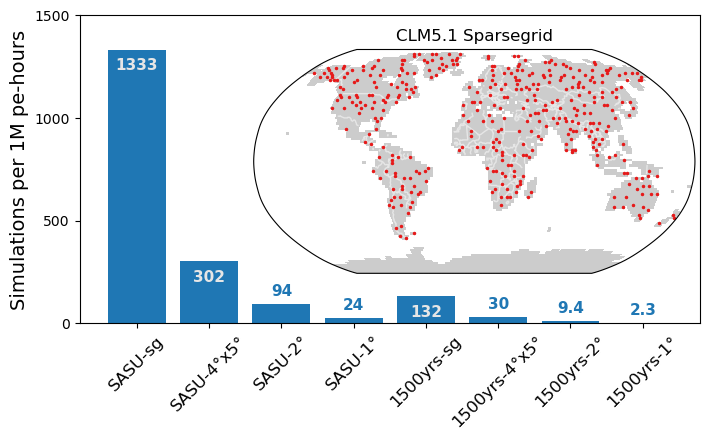

In [24]:
fig=plt.figure(figsize=[8,4])
ax0=fig.add_subplot(111)
x=np.flip([m for m in svals])
y=[svals[m] for m in x]
ax0.bar(x,y)
ax0.set_xticklabels(x,rotation=45,fontsize=12)
ax0.set_ylabel('Simulations per 1M pe-hours',fontsize=14)
ax0.set_ylim([0,1500]);
ax0.set_yticks(500*np.arange(4))

for i in range(8):
    if y[i]>100:
        c=0.9*np.ones(3)
        plt.text(i,y[i]-100,y[i],ha='center',color=c,fontsize=11,fontweight='bold')
    else:
        c='C0'
        plt.text(i,y[i]+40,y[i],ha='center',color=c,fontsize=11,fontweight='bold')


axs = fig.subplot_mosaic('AA;XB;CC',gridspec_kw={'height_ratios': [0.5,7, 1],'width_ratios': [1, 4]},
                             subplot_kw={'projection': ccrs.Robinson()})
axs['A'].set_axis_off()
axs['C'].set_axis_off()
axs['X'].set_axis_off()

ax=axs['B']
cmap=ListedColormap(0.8*np.ones(3))
x=ds.landfrac_orig>0
mappable = x.where(x).plot(transform=ccrs.PlateCarree(),ax=ax,add_colorbar=False,cmap=cmap)
lats.plot.line('.',transform=ccrs.PlateCarree(),ax=ax,color=[0.9,0.1,0.1],ms=3,label='sparsegrid')
ax.set_title('CLM5.1 Sparsegrid')
transform = ccrs.PlateCarree()._as_mpl_transform(ax)
ax.add_feature(cfeature.BORDERS,edgecolor=[0.9,0.9,0.9]);
plt.savefig('../figs/main/sims.png',dpi=300,bbox_inches='tight')